## 1. 음성 로드한다

In [ ]:
%pwd

'/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1) Google Drive 마운트
from google.colab import drivedrive.mount('/content/drive') 
import zipfileimport os

# 2) zip 파일 압축 해제
with zipfile.ZipFile('/content/drive/MyDrive/ETRI/KEMDy20_v1_1.zip', 'r') as zip_ref: 
    zip_ref.extractall('/content/drive/MyDrive/ETRI/KEMDy20_v1_1') 

# 3) wav 폴더 생성
wav_path = "/content/drive/MyDrive/ETRI/wav_pre"if not os.path.exists(wav_path): 
os.makedirs(wav_path) 

# 4) 압축 해제 한 폴더 안의 음성파일 -> 전처리할 음성폴더로 이동
import os
import shutil

src_dir = "/content/drive/MyDrive/ETRI/KEMDy20_v1_1/wav"
dst_dir = "/content/drive/MyDrive/ETRI/wav_pre"

if not os.path.exists(dst_dir): 
    os.makedirs(dst_dir) 
    
for session_dir in os.listdir(src_dir): 
    if session_dir.startswith("Session"): 
        session_dir_path = os.path.join(src_dir, session_dir) 
        for wav_file in os.listdir(session_dir_path): 
            if wav_file.startswith("Sess") and wav_file.endswith(".wav"): 
                wav_file_path = os.path.join(session_dir_path, wav_file) 
                dst_file_path = os.path.join(dst_dir, wav_file) 
                shutil.move(wav_file_path, dst_file_path) 
                
# 파일옮겨졌는지 개수 확인 
import os

dir_path = "/content/drive/MyDrive/ETRI/wav_pre"
file_count = len(os.listdir(dir_path)) 
print(f"The number of files in {dir_path} is {file_count}")

In [ ]:
import librosa

path = '/content/drive/MyDrive/KEMDy20_v1_1/wav/Session04/'
data, sr = librosa.load(path + 'Sess04_script01_User008F_022.wav')

## 2. 그 다음 컴퓨터가 알아들을 수 있게 푸리에 변환 등등 작업을 한다.
- 푸리에 변환
- STFT (나는 이것을 pick!)
- Wavelet 변환

In [ ]:
import pywt

# 푸리에
# data_fft = librosa.stft(data)

# STFT
stft = librosa.stft(data)

# wavelet
# data_wavelet = pywt.wavedec(data, 'db1', level=5)

In [ ]:
print('푸리에 : ', data_fft)
print('====================================================================')
print('stft : ', stft)
print('===================================================================')
print('data_wavelet : ', data_wavelet)

푸리에 :  [[-8.31730556e+00+0.00000000e+00j -2.05440159e+01+0.00000000e+00j
  -2.55110970e+01+0.00000000e+00j ...  8.78244495e+00+0.00000000e+00j
   1.97087157e+00+0.00000000e+00j -1.03779304e+00+0.00000000e+00j]
 [ 2.52216244e+00-6.39200783e+00j  1.21845407e+01-5.55522442e+00j
   1.43877325e+01+7.87942886e-01j ... -4.92495060e+00-3.55300927e+00j
  -1.05579093e-01-3.08642316e+00j  1.26837671e+00+2.27971822e-01j]
 [ 2.24914217e+00+2.87866640e+00j -1.89502168e+00+1.39025772e+00j
  -1.60760128e+00-7.22504735e-01j ...  7.39939988e-01+1.21674812e+00j
  -7.17870295e-01+9.63724315e-01j -9.47387040e-01-7.45933890e-01j]
 ...
 [-1.74150057e-02+9.52348273e-05j  8.68347380e-03-4.75740526e-05j
   1.27431022e-07-1.08709415e-08j ... -9.92249483e-08-2.33492550e-08j
  -1.61785618e-04-1.43134501e-04j  4.85229248e-04+4.29004256e-04j]
 [ 1.74152032e-02-4.74877561e-05j -2.35235857e-05-8.68382119e-03j
  -5.31102060e-08-1.67378474e-07j ...  1.27746958e-07+1.30843212e-08j
   7.64795186e-05-2.02217183e-04j -6.057

## 3. 그 다음 mfcc로 현재 입력된 음성 데이터의 특징 벡터들을 mfcc로 추출한다.

In [ ]:
data, sr

(array([-0.04640822, -0.04749838, -0.03206895, ..., -0.00836119,
        -0.01488197, -0.00637813], dtype=float32), 22050)

In [ ]:
import librosa
import numpy as np

# 오디오 파일 로딩
path = '/content/drive/MyDrive/KEMDy20_v1_1/wav/Session04/'
data, sr = librosa.load(path + 'Sess04_script01_User008F_022.wav')

# 로딩한 파일 컴퓨터가 알아들을 수 있게 변환 >> 스펙트로그램 추출
spectrogram = librosa.stft(data)

# MFCC 계수 추출
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(np.abs(spectrogram)**2), sr=sr, n_mfcc=20)


In [ ]:
mfccs

array([[-8.0821045e+02, -9.6371136e+02, -1.0981097e+03, ...,
        -8.5288214e+02, -8.7377319e+02, -8.9152112e+02],
       [ 2.6556525e+02,  3.1290179e+02,  3.7060272e+02, ...,
         5.1775635e+02,  5.1220685e+02,  5.0485016e+02],
       [ 9.6313133e+01,  1.3105200e+02,  1.9591083e+02, ...,
         8.5082932e+01,  1.0475791e+02,  1.2539822e+02],
       ...,
       [-3.8093489e-01,  1.9362037e+00,  6.4666958e+00, ...,
        -1.3622080e+01, -5.5730400e+00,  1.0083487e+01],
       [ 2.9806691e-01,  2.8941345e+00,  1.1287273e+01, ...,
        -3.9765938e+01, -1.3015095e+01,  2.1265984e+00],
       [-3.3514719e+00, -6.1712904e+00, -5.6152945e+00, ...,
        -4.1523277e+01, -2.8023287e+01, -2.8749191e+01]], dtype=float32)

### 3-1) MFCC 시각화

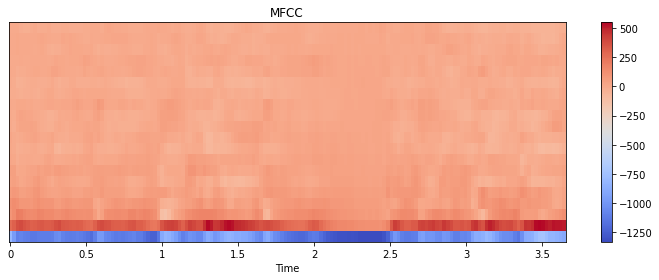

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# data, sr = librosa.load('audio_file.wav')
# mfccs = librosa.feature.mfcc(data, sr=sr, n_mfcc=20)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()